# IMDB Cerifications


In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, json, math, time
from tqdm.notebook import tqdm_notebook
import tmdbsimple as tmdb 

In [2]:
# Load the data
df0 = pd.read_csv('Data/final_tmdb_data_2000.csv.gz')
df1 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz')

In [3]:
# Display info for year 2000
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                1249 non-null   object 
 1   adult                  1248 non-null   float64
 2   backdrop_path          695 non-null    object 
 3   belongs_to_collection  117 non-null    object 
 4   budget                 1248 non-null   float64
 5   genres                 1248 non-null   object 
 6   homepage               63 non-null     object 
 7   id                     1248 non-null   float64
 8   original_language      1248 non-null   object 
 9   original_title         1248 non-null   object 
 10  overview               1227 non-null   object 
 11  popularity             1248 non-null   float64
 12  poster_path            1129 non-null   object 
 13  production_companies   1248 non-null   object 
 14  production_countries   1248 non-null   object 
 15  rele

In [4]:
# Display info for year 2001
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1343 entries, 0 to 1342
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                1343 non-null   object 
 1   adult                  1342 non-null   float64
 2   backdrop_path          727 non-null    object 
 3   belongs_to_collection  93 non-null     object 
 4   budget                 1342 non-null   float64
 5   genres                 1342 non-null   object 
 6   homepage               108 non-null    object 
 7   id                     1342 non-null   float64
 8   original_language      1342 non-null   object 
 9   original_title         1342 non-null   object 
 10  overview               1316 non-null   object 
 11  popularity             1342 non-null   float64
 12  poster_path            1210 non-null   object 
 13  production_companies   1342 non-null   object 
 14  production_countries   1342 non-null   object 
 15  rele

In [5]:
# Combine the two dataframes
cat_df = [df0, df1]
new_df = pd.concat((cat_df), ignore_index=True, sort=False)

In [6]:
# Display the concatenated dataframe
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2592 entries, 0 to 2591
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2592 non-null   object 
 1   adult                  2590 non-null   float64
 2   backdrop_path          1422 non-null   object 
 3   belongs_to_collection  210 non-null    object 
 4   budget                 2590 non-null   float64
 5   genres                 2590 non-null   object 
 6   homepage               171 non-null    object 
 7   id                     2590 non-null   float64
 8   original_language      2590 non-null   object 
 9   original_title         2590 non-null   object 
 10  overview               2543 non-null   object 
 11  popularity             2590 non-null   float64
 12  poster_path            2339 non-null   object 
 13  production_companies   2590 non-null   object 
 14  production_countries   2590 non-null   object 
 15  rele

In [7]:
# Exclude movies with a 0 budget
new_df = new_df[(new_df['budget']>0)]

In [8]:
# Exclude movies with a 0 revenue
new_df = new_df[new_df['revenue']>0]

In [9]:
# display movies with above a 0 revenue AND budget
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356 entries, 4 to 2538
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                356 non-null    object 
 1   adult                  356 non-null    float64
 2   backdrop_path          349 non-null    object 
 3   belongs_to_collection  89 non-null     object 
 4   budget                 356 non-null    float64
 5   genres                 356 non-null    object 
 6   homepage               51 non-null     object 
 7   id                     356 non-null    float64
 8   original_language      356 non-null    object 
 9   original_title         356 non-null    object 
 10  overview               356 non-null    object 
 11  popularity             356 non-null    float64
 12  poster_path            356 non-null    object 
 13  production_companies   356 non-null    object 
 14  production_countries   356 non-null    object 
 15  relea

In [10]:
# List number of movies in each certification category
new_df['certification'].value_counts()

R        144
PG-13    117
PG        30
G         13
NR         7
Name: certification, dtype: int64

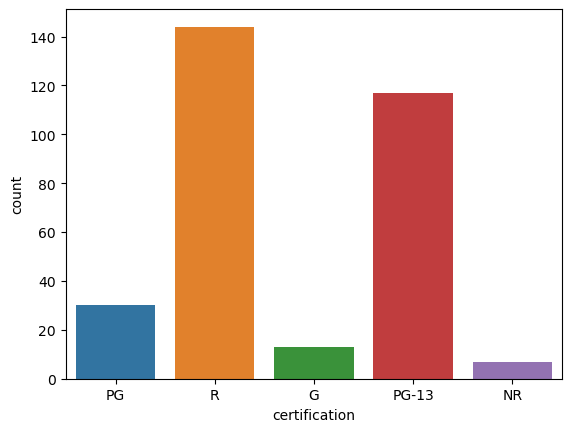

In [12]:
# Visual for the count of each cerifications?
sns.countplot(data=new_df, x = 'certification');

In [ ]:
# Average revenue per certification category
rev= new_df.groupby('certification')['revenue'].mean()
round(rev)

In [ ]:
# Average budget per certification category
bud = new_df.groupby('certification')['budget'].mean()
round(bud)

In [ ]:
# Save the results
new_df.to_csv(f'Data/tmdb_results_combined.csv.gz',compression = 'gzip',index=False)